#### Welcome to some traffic crash analysis!!

In [1]:
import pandas as pd

#import the data!!!!
data_frame = pd.read_csv("C:/Users/aaron/Code/Data/Real-Time_Traffic_Incident_Reports.csv")

data_frame.head()


###make a quuick change to see what happens

### Hello! The data set I am using can be found at -->
###https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x
### This set has 9 columns. And a lotta rows. Goodluck



### NOTE!!! Check out this --> https://data.austintexas.gov/Transportation-and-Mobility/Austin-Crash-Report-Data-Crash-Level-Records/y2wy-tgr5  data instead 
### it is used to create the vision zero visualizations

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000


In [2]:
data_frame.info()

## looks like Traffic Report ID, Published Date, Issue Reported, Address, and Status Date all have no Nulls whereas
## Location, Latitude, Longitude, and Status all have at least some null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345411 entries, 0 to 345410
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Traffic Report ID  345411 non-null  object 
 1   Published Date     345411 non-null  object 
 2   Issue Reported     345411 non-null  object 
 3   Location           344613 non-null  object 
 4   Latitude           345332 non-null  float64
 5   Longitude          345332 non-null  float64
 6   Address            345411 non-null  object 
 7   Status             343718 non-null  object 
 8   Status Date        345411 non-null  object 
dtypes: float64(2), object(7)
memory usage: 23.7+ MB


In [3]:
data_frame.nunique()

###data_frame['Published Date'] = pd.to_datetime(data_frame['Published Date'], errors='coerce') Ok it seems as if Issue Reported and Status should both be type 'category' because they have a limited amount of values.
### 24 and 2 respectively. All other columns have over 10,000 unique values.

Traffic Report ID    345411
Published Date       340252
Issue Reported           24
Location             161292
Latitude             127527
Longitude            122279
Address              106546
Status                    2
Status Date          231250
dtype: int64

In [4]:
### Converting those two columns to categories

data_frame['Issue Reported'] = data_frame['Issue Reported'].astype('category')
data_frame['Status'] = data_frame['Status'].astype('category')
data_frame['Published Date'] = pd.to_datetime(data_frame['Published Date'], errors='coerce')


#data_frame.info()

In [5]:
Issue_categories = data_frame['Issue Reported'].cat.categories

Issue_categories

Index(['AUTO/ PED', 'BLOCKED DRIV/ HWY', 'BOAT ACCIDENT', 'COLLISION',
       'COLLISION WITH INJURY', 'COLLISION/PRIVATE PROPERTY',
       'COLLISN / FTSRA', 'COLLISN/ LVNG SCN', 'Crash Service', 'Crash Urgent',
       'FLEET ACC/ FATAL', 'FLEET ACC/ INJURY', 'HIGH WATER', 'ICY ROADWAY',
       'LOOSE LIVESTOCK', 'N / HZRD TRFC VIOL', 'OBSTRUCT HWY',
       'Stalled Vehicle', 'TRAFFIC FATALITY', 'TRFC HAZD/ DEBRIS',
       'Traffic Hazard', 'Traffic Impediment', 'VEHICLE FIRE',
       'zSTALLED VEHICLE'],
      dtype='object')

In [6]:
upper_case_addy = data_frame['Address']

upper_case_addy = upper_case_addy.str.upper()

data_frame['Address'] = upper_case_addy

#data_frame.head()

### This cell is just setting the Address to all upper case so I can identify all instances of addresses properly

In [7]:
on_guad = data_frame['Address'].str.contains('GUADALUPE', regex=False)

on_guad.sum()

2561

In [8]:
on_35 = data_frame['Address'].str.contains('IH 35|IH-35|IH35|I35', regex = True)

#on_35.describe()

In [9]:
#adding on 35 as a column
data_frame['On 35'] = on_35

In [10]:
# finding all rows that have some alternate spelling of IH 35
#alt_35_spellings = data_frame['Address'].str.contains('IH-35|IH35|I35', regex=True)

#alt_35_spellings.sum()

In [11]:
#misspelled = data_frame[alt_35_spellings]

#misspelled

In [12]:
#data_frame['Address'] = data_frame['Address'].str.replace('IH-35', 'IH 35', inplace=True)

#data_frame.head()

#editor

In [13]:
is_fatal = data_frame['Issue Reported'].str.contains('FLEET ACC/ INJURY')

is_fatal.sum()

44

In [14]:
fatal_crashes = data_frame[is_fatal]

In [15]:
fatal_on_35 = fatal_crashes['Address'].str.contains('IH 35', regex = False)

fatal_crashes[fatal_on_35]

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,On 35
22728,DD1E4AB55AAB789BC3D29E46540739AB435478B4_16100...,2021-01-07 17:27:26+00:00,FLEET ACC/ INJURY,"(30.338855,-97.699555)",30.338855,-97.699555,N IH 35 SVRD NB & E ANDERSON LN SVRD EB,ARCHIVED,01/07/2021 09:45:03 PM +0000,True
169524,5D1BDAE6389C2A1988415D2F9B9EC2070341371D_15277...,2018-05-31 07:16:00+00:00,FLEET ACC/ INJURY,"(30.400949,-97.674386)",30.400949,-97.674386,12300-BLK N IH 35 SB,ARCHIVED,05/31/2018 09:15:00 AM +0000,True


In [16]:
##attempt of category plot

data_frame['Issue Reported'].value_counts()

#Data_Frame.plot.bar(x= 'Issue Reported', y = 'Issue Reported'

Traffic Hazard                104838
Crash Urgent                   82741
Crash Service                  48502
COLLISION                      33614
TRFC HAZD/ DEBRIS              25499
LOOSE LIVESTOCK                 9507
zSTALLED VEHICLE                8930
COLLISION WITH INJURY           8629
Stalled Vehicle                 6500
COLLISN/ LVNG SCN               6376
Traffic Impediment              6255
COLLISION/PRIVATE PROPERTY      1474
VEHICLE FIRE                    1283
BLOCKED DRIV/ HWY                769
BOAT ACCIDENT                    129
AUTO/ PED                        112
TRAFFIC FATALITY                 106
ICY ROADWAY                       74
FLEET ACC/ INJURY                 44
N / HZRD TRFC VIOL                11
OBSTRUCT HWY                       9
HIGH WATER                         5
FLEET ACC/ FATAL                   3
COLLISN / FTSRA                    1
Name: Issue Reported, dtype: int64

In [17]:
urgent_crash_mask = data_frame['Issue Reported'].str.contains('Crash Urgent')

urgent_crashes = data_frame[urgent_crash_mask]

urgent_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 2 to 345410
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Traffic Report ID  82741 non-null  object             
 1   Published Date     82741 non-null  datetime64[ns, UTC]
 2   Issue Reported     82741 non-null  category           
 3   Location           82692 non-null  object             
 4   Latitude           82736 non-null  float64            
 5   Longitude          82736 non-null  float64            
 6   Address            82741 non-null  object             
 7   Status             82465 non-null  category           
 8   Status Date        82741 non-null  object             
 9   On 35              82741 non-null  bool               
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 5.3+ MB


In [18]:
I_35_mask = urgent_crashes['Address'].str.contains('IH 35', regex = False)

urgent_crashes[I_35_mask].count()

Traffic Report ID    12018
Published Date       12018
Issue Reported       12018
Location             12007
Latitude             12018
Longitude            12018
Address              12018
Status               11959
Status Date          12018
On 35                12018
dtype: int64

### Lets try to order by date

In [19]:
data_frame['Year'] = data_frame['Published Date'].astype(str).str[0:4]

data_frame.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,On 35,Year
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000,False,2018
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000,False,2018
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000,False,2020
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-BLK S IH 35 SB,ARCHIVED,04/17/2020 09:55:03 PM +0000,True,2020
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S US 183 HWY SB,ARCHIVED,04/17/2020 11:30:04 PM +0000,False,2020


In [20]:
chron_frame = data_frame.sort_values(by='Published Date')

chron_frame.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,On 35,Year
164044,EC10DB9185C9C58A004FA683DD21AFCD16CAD418,2017-09-26 16:11:00+00:00,COLLISION,"(30.2303264,-97.8199774)",30.230326,-97.819977,5400 BRODIE LN,ARCHIVED,05/18/2018 01:00:00 AM +0000,False,2017
163220,B25B748A59D8B6B5B5AE3E9D985289E795C874ED,2017-09-26 16:19:00+00:00,Crash Service,"(30.2016097,-97.8530411)",30.201610,-97.853041,8800 CORRAN FERRY DR,ARCHIVED,05/18/2018 01:00:00 AM +0000,False,2017
163205,B17F4787F2799F2665E5F119FC2F47D569212C4C,2017-09-26 16:55:00+00:00,Crash Urgent,"(30.3439776,-97.7149716)",30.343978,-97.714972,N LAMAR BLVD NB & MORROW ST,ARCHIVED,05/18/2018 01:00:00 AM +0000,False,2017
164692,15D1EE116284B85E5DE3E00564518367FE994DE7,2017-09-26 17:08:00+00:00,Crash Service,"(30.3966315,-97.8487281)",30.396632,-97.848728,11000 FM 2222 RD,ARCHIVED,05/18/2018 01:00:00 AM +0000,False,2017
166401,89CA91E6C9B28BDCFB629B12758F955D21072594,2017-09-26 17:20:00+00:00,Crash Service,"(30.339233,-97.7779837)",30.339233,-97.777984,MOUNT BONNELL RD & TORTUGA TRL,ARCHIVED,05/18/2018 01:00:00 AM +0000,False,2017


In [21]:
year_and_35 = data_frame.groupby('Year').agg({'On 35':'mean'})

year_and_35


,On 35
Year,
2017,0.147610
2018,0.144613
2019,0.109756
2020,0.107500
2021,0.101328
2022,0.095615
2023,0.092541


<Axes: xlabel='Year'>

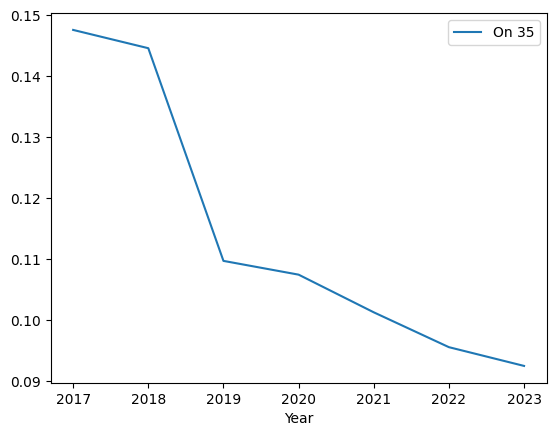

In [22]:
year_and_35.plot()

In [23]:
#clean the lat and long data

#make new df that doesnt have rows with bad lat/long data using df.drop

print (data_frame['Longitude'].describe())
print (data_frame['Latitude'].describe())

## these two lines below are super important because there are a few lat/long data points that are missing a decimal or something
lat_long_df = data_frame[(data_frame['Longitude'] < -95) & (data_frame['Longitude'] > -98.5)]
lat_long_df = lat_long_df[(lat_long_df['Latitude'] > 30) & (lat_long_df['Latitude'] < 30.7)]


print (lat_long_df['Longitude'].describe())
print (lat_long_df['Latitude'].describe())
#print data_



#for col in data_frame:
 #   print (data_frame['Longitude'])
    #if('Longitude'):
        


#data_frame.plot(x = 'Longitude', y = 'Latitude', kind = 'scatter')

count    345332.000000
mean        -97.527818
std           4.455696
min         -98.816154
25%         -97.776533
50%         -97.732673
75%         -97.683918
max           0.000000
Name: Longitude, dtype: float64
count    3.453320e+05
mean     5.291737e+03
std      3.958544e+05
min      0.000000e+00
25%      3.023119e+01
50%      3.029433e+01
75%      3.037377e+01
max      2.999603e+07
Name: Latitude, dtype: float64
count    344529.000000
mean        -97.731251
std           0.089423
min         -98.421481
25%         -97.776627
50%         -97.732836
75%         -97.684293
max         -97.108986
Name: Longitude, dtype: float64
count    344529.000000
mean         30.301394
std           0.094738
min          30.003032
25%          30.231572
50%          30.294637
75%          30.373888
max          30.694411
Name: Latitude, dtype: float64


In [24]:
lat_long_df['Latitude'] = round(lat_long_df['Latitude'], 3)
lat_long_df['Longitude'] = round(lat_long_df['Longitude'], 3)


print(lat_long_df.nunique())
lat_long_df.head()

Traffic Report ID    344529
Published Date       339394
Issue Reported           24
Location             161213
Latitude                632
Longitude               786
Address               85989
Status                    2
Status Date          230887
On 35                     2
Year                      7
dtype: int64


,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date,On 35,Year
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,2018-06-13 06:35:59+00:00,Crash Service,"(30.283797,-97.741906)",30.284,-97.742,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000,False,2018
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,2018-06-13 10:15:36+00:00,Traffic Hazard,"(30.339593,-97.700963)",30.340,-97.701,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000,False,2018
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,2020-04-17 21:25:03+00:00,Crash Urgent,"(30.329455,-97.638105)",30.329,-97.638,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000,False,2020
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,2020-04-17 21:40:52+00:00,Traffic Hazard,"(30.202806,-97.760701)",30.203,-97.761,5300-BLK S IH 35 SB,ARCHIVED,04/17/2020 09:55:03 PM +0000,True,2020
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,2020-04-17 21:00:55+00:00,Crash Urgent,"(30.184265,-97.687339)",30.184,-97.687,4500-4720 S US 183 HWY SB,ARCHIVED,04/17/2020 11:30:04 PM +0000,False,2020


In [25]:
#print (lat_long_df.info())


location_group = lat_long_df.groupby('Year').agg({'Latitude':'count', 'Longitude':'count'}).reset_index()
location_group

,Year,Latitude,Longitude
0,2017,17110,17110
1,2018,69895,69895
2,2019,67896,67896
3,2020,45226,45226
4,2021,51237,51237
5,2022,52957,52957
6,2023,40208,40208


<Axes: xlabel='Longitude', ylabel='Latitude'>

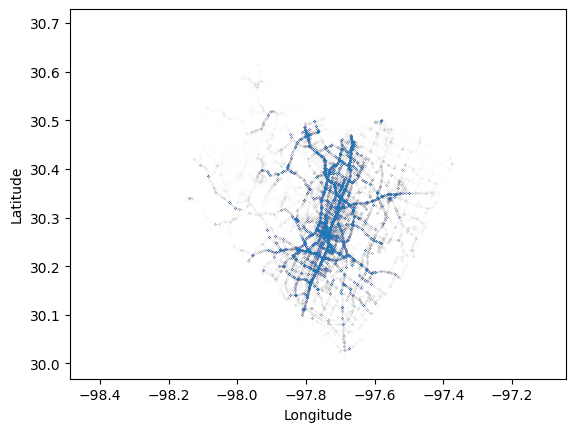

In [26]:
lat_long_df.plot(x = 'Longitude', y = 'Latitude', kind = 'scatter', s= 0.00001, stacked = True)

<Axes: xlabel='Longitude', ylabel='Latitude'>

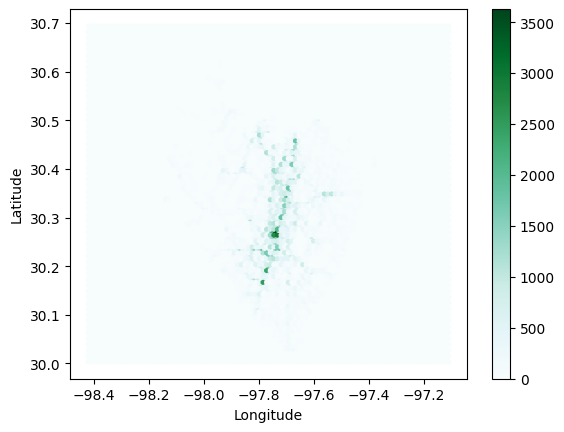

In [27]:
lat_long_df.plot(x = 'Longitude', y = 'Latitude', kind = 'hexbin')